<a href="https://colab.research.google.com/github/dacenish/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction_ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [666]:
# Import Libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [559]:
# Load Dataset
# filepath = '/content/data_airline_reviews.csv'
# df = pd.read_csv(filepath)

drive.mount('/content/drive')
filepath = '/content/drive/My Drive/data_airline_reviews.csv'
df = pd.DataFrame(pd.read_csv(filepath))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [560]:
# Dataset First Look
df.head(5)


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
df.tail(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [562]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [563]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [564]:
# Dataset Duplicate Value Count
df.duplicated().sum()

70711

In [565]:
# Droping Duplicat Values
df.drop_duplicates(inplace=True)
print('Shape of Dataframe after dropping dupicates:',df.shape)

Shape of Dataframe after dropping dupicates: (61184, 17)


#### Missing Values/Null Values

In [566]:
# Missing Values/Null Values Count
df_null = df.isnull().sum()/len(df)*100

pd.DataFrame(df_null,columns = ['Null Percentage'])

,Null Percentage
airline,0.001634
overall,2.914161
author,0.001634
review_date,0.001634
customer_review,0.001634
aircraft,69.782950
traveller_type,38.644090
cabin,4.051713
route,38.688219
date_flown,38.817338


<Axes: >

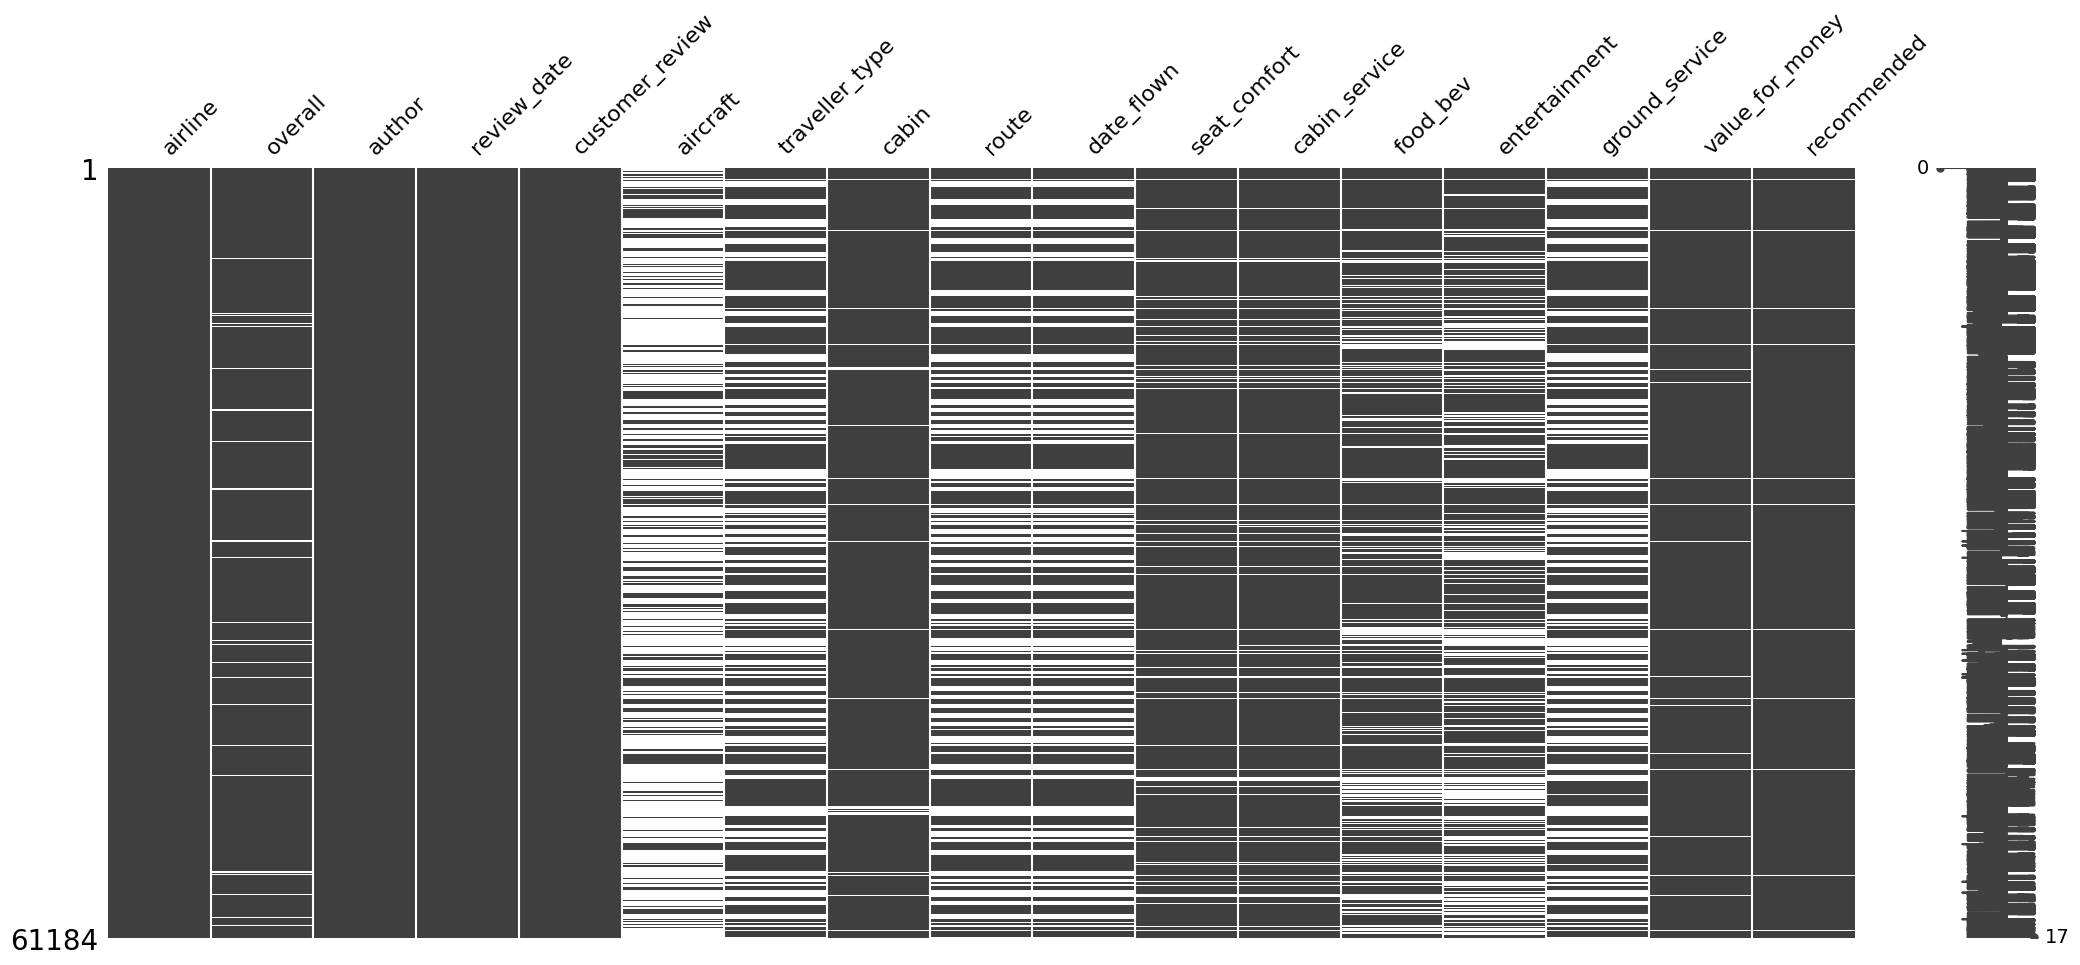

In [567]:
# Visualizing the missing values
msno.matrix(df)

In [568]:
# df.dropna(axis = 0,how = 'all',inplace = True)
# df.drop(['aircraft','author','customer_review'],axis = 1,inplace = True)
# df_clean = df.dropna(axis = 0,how='any')

In [569]:
df['traveller_type'].unique()

array([nan, 'Business', 'Family Leisure', 'Solo Leisure',
       'Couple Leisure'], dtype=object)

### What did you know about your dataset?

**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. Feature descriptions briefly as follows:**

## ***2. Understanding Your Variables***

In [570]:
# Dataset Columns
columns_list = df.columns

pd.DataFrame(columns_list, columns=['Columns'], index= range(1,17+1))


,Columns
1,airline
2,overall
3,author
4,review_date
5,customer_review
6,aircraft
7,traveller_type
8,cabin
9,route
10,date_flown


In [571]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### Variables Description

airline: Name of the airline.

overall: Overall point is given to the trip between 1 to 10.

author: Author of the trip

reviewdate: Date of the Review

customer review: Review of the customers in free text format

aircraft: Type of the aircraft

traveller type: Type of traveler (e.g. business, leisure)

cabin: Cabin at the flight

date flown: Flight date

seat comfort: Rated between 1-5

cabin service: Rated between 1-5

food bev: Rated between 1-5

entertainment: Rated between 1-5

ground service: Rated between 1-5

value for money: Rated between 1-5

### Check Unique Values for each variable.

In [572]:
# Check Unique Values for each variable.

unique_count_dict = {}

for col in columns_list:
  unique_count = df[col].nunique()
  unique_count_dict[col] = unique_count

# Create a DataFrame from the unique_count_dict
unique_counts_df = pd.DataFrame(
    list(unique_count_dict.items()),
    columns=['Column', 'Unique Values'],
    index = range(1,17+1))

# Print or display the DataFrame
unique_counts_df

,Column,Unique Values
1,airline,81
2,overall,10
3,author,44069
4,review_date,3015
5,customer_review,61172
6,aircraft,2088
7,traveller_type,4
8,cabin,4
9,route,24549
10,date_flown,63


## 3. ***Data Wrangling***

### Data Wrangling Code

In [573]:
# Write your code to make your dataset analysis ready.


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1. Most Preferred Class

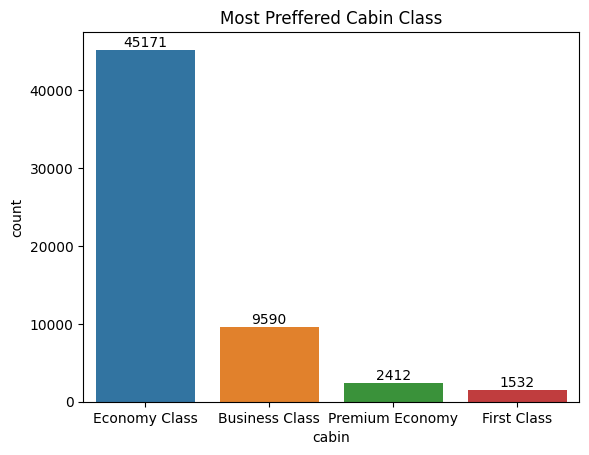

In [574]:
# Chart - 1 visualization code

ax = sns.countplot(data = df,x = df['cabin'])
for label in ax.containers:
    ax.bar_label(label)
plt.title('Most Preffered Cabin Class')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

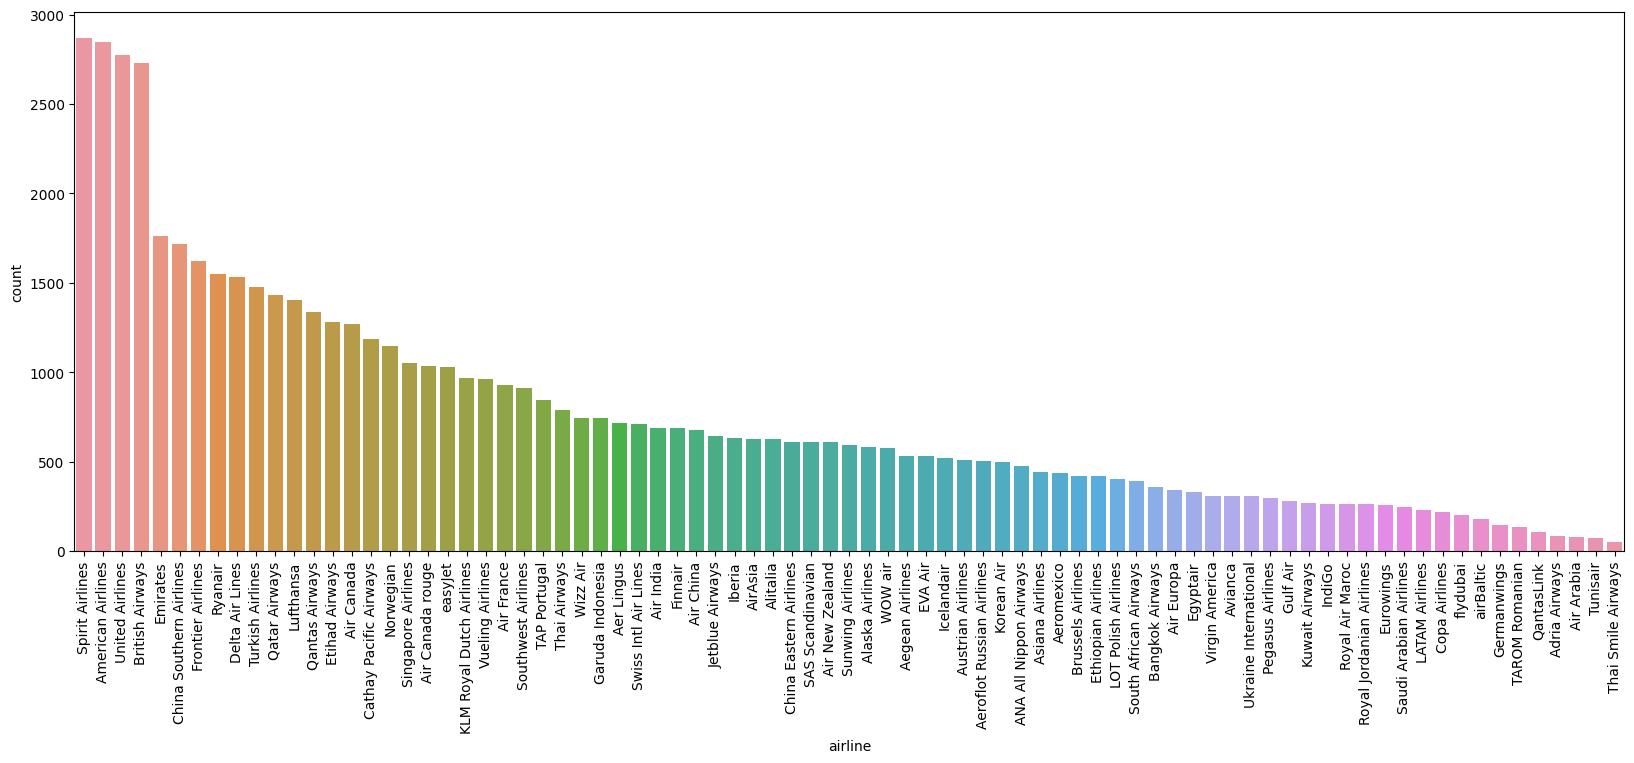

In [575]:
# Chart - 2 visualization code

plt.figure(figsize = (20,7))
sns.countplot(data = df[df['date_flown'] == 'August 2015'],
              x = df['airline'].sort_values(ascending = False),
             order = df['airline'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

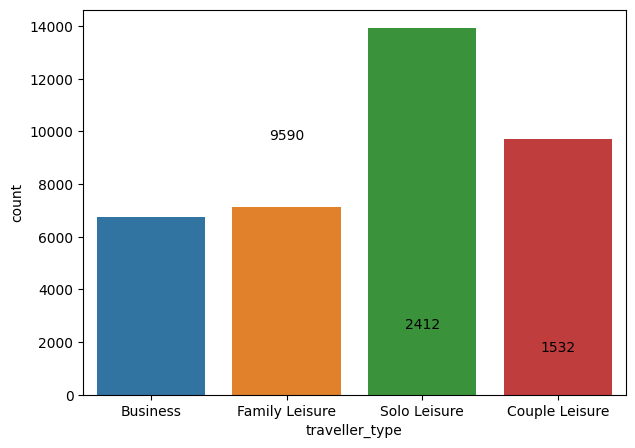

In [576]:
# Chart - 3 visualization code

plt.figure(figsize = (7,5))
ax2 = sns.countplot(data = df, x = df['traveller_type'])
for label in ax.containers:
    ax2.bar_label(label)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

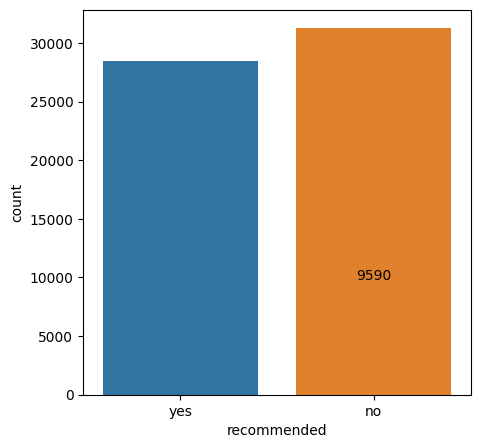

In [577]:
# Chart - 4 visualization code

plt.figure(figsize = (5,5))
ax2 = sns.countplot(data = df, x = df['recommended'])
for label in ax.containers:
    ax2.bar_label(label)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [578]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [579]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [580]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [581]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [582]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [583]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [584]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [585]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [586]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

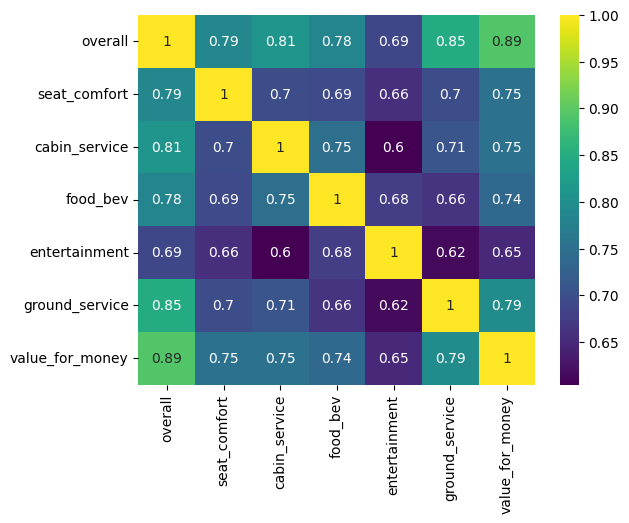

In [587]:
# Correlation Heatmap visualization code

sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [588]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [589]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [590]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [591]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [596]:
# Handling Missing Values & Missing Value Imputation

# Drop specific columns from the DataFrame
columns_to_drop = ['aircraft', 'route', 'date_flown', 'author', 'review_date', 'customer_review']
df.drop(columns=columns_to_drop, inplace=True)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no


In [599]:
# Numerical Imputation
columns_to_impute = ['overall', 'seat_comfort', 'cabin_service', 'food_bev','entertainment', 'ground_service', 'value_for_money']
num_impute_data = df[columns_to_impute]

knn_imputer = KNNImputer(n_neighbors=2)
knn_imputed_data = knn_imputer.fit_transform(num_impute_data)

df[columns_to_impute] = knn_imputed_data

In [621]:
# Categorical Imputation
cat_columns_to_impute = ['airline', 'traveller_type', 'cabin', 'recommended']

imputed_data = df.copy()

label_encoders = {}

for col in cat_columns_to_impute:
    le = LabelEncoder()
    imputed_data[col] = le.fit_transform(imputed_data[col].astype(str))
    label_encoders[col] = le
imputed_data

# # To inverse transform the encoded data back to original labels
# # Example for 'airline' column:
# original_labels = label_encoders['airline'].inverse_transform(imputed_data['airline'])


airline            0
overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

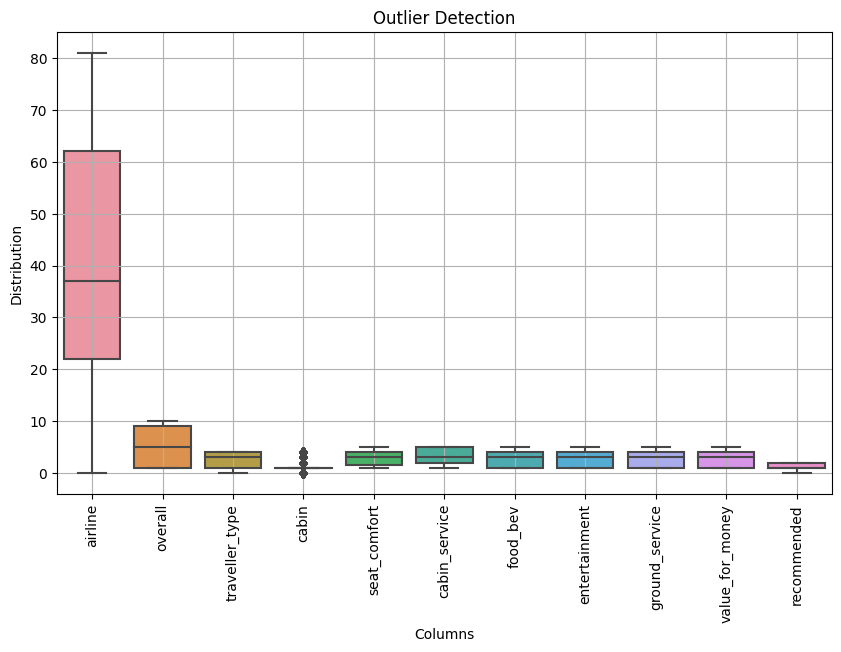

In [642]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10,6))
sns.boxplot(imputed_data)
plt.xlabel('Columns')
plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.grid()
plt.title('Outlier Detection')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [667]:
# # Encode your categorical columns
# df = pd.get_dummies(data = df, columns = ['recommended','traveller_type','cabin'],drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [325]:
# Expand Contraction

#### 2. Lower Casing

In [326]:
# Lower Casing

#### 3. Removing Punctuations

In [327]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [328]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [329]:
# Remove Stopwords

In [330]:
# Remove White spaces

#### 6. Rephrase Text

In [331]:
# Rephrase Text

#### 7. Tokenization

In [332]:
# Tokenization

#### 8. Text Normalization

In [333]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [334]:
# POS Taging

#### 10. Text Vectorization

In [335]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [336]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [663]:
# Select your features wisely to avoid overfitting

X = imputed_data.drop('recommended',axis = 1)
y = imputed_data['recommended']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [664]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(48947, 10)
(12237, 10)


##### What data splitting ratio have you used and why?

 I used 80:20 Ratio as it is most preferable ratio in the industry.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### **1. Logistic Regression Model**

In [668]:
# ML Model - 1 Logistic Regression -

log_model = LogisticRegression()

# Fit the Algorithm

log_model.fit(X_train,y_train)

# Predict on the model

predicted = log_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [651]:
# Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test,predicted))

[[ 144   71   81]
 [  65 5892  265]
 [  42  282 5395]]


              precision    recall  f1-score   support

           0       0.57      0.49      0.53       296
           1       0.94      0.95      0.95      6222
           2       0.94      0.94      0.94      5719

    accuracy                           0.93     12237
   macro avg       0.82      0.79      0.80     12237
weighted avg       0.93      0.93      0.93     12237



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **2. RandomForestClassifier (RFC) Model**

In [665]:
# ML Model - 2 Random Forest Classifier -

rfc = RandomForestClassifier()

# Fit the Algorithm
rfc.fit(X_train,y_train)

# Predict on the model
predicted = rfc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [662]:
# Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test,predicted))

[[ 442    5    0]
 [   6 8987  373]
 [   0  425 8118]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       447
           1       0.95      0.96      0.96      9366
           2       0.96      0.95      0.95      8543

    accuracy                           0.96     18356
   macro avg       0.97      0.97      0.97     18356
weighted avg       0.96      0.96      0.96     18356



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **3 Artificial Neural Networks (ANN) Model**

In [670]:
# ML Model - 3 Artificial Neural Networks (ANN)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)
X_train_val = X_train.values
y_train_val = y_train.values
X_test_val = X_test.values
y_test_val = y_test.values


#Transforming variables -
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit_transform(X_train_val)
scaler.transform(X_test_val)

# Fit the Algorithm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',patience = 2)

model = Sequential()

model.add(Dense(14,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

model.fit(x=X_train_val,y=y_train_val,epochs = 100,callbacks=[earlystop],validation_data =(X_test_val,y_test_val))


Epoch 1/100
1339/1339 [==============================] - 4s 2ms/step - loss: -2776.2390 - accuracy: 0.5042 - val_loss: -10847.4912 - val_accuracy: 0.5106
Epoch 2/100
1339/1339 [==============================] - 2s 2ms/step - loss: -36222.1406 - accuracy: 0.5112 - val_loss: -72484.4453 - val_accuracy: 0.5106
Epoch 3/100
1339/1339 [==============================] - 2s 2ms/step - loss: -132409.4062 - accuracy: 0.5112 - val_loss: -205082.0312 - val_accuracy: 0.5106
Epoch 4/100
1339/1339 [==============================] - 2s 2ms/step - loss: -304766.5625 - accuracy: 0.5112 - val_loss: -419277.4062 - val_accuracy: 0.5106
Epoch 5/100
1339/1339 [==============================] - 3s 2ms/step - loss: -563289.5000 - accuracy: 0.5112 - val_loss: -724110.8750 - val_accuracy: 0.5106
Epoch 6/100
1339/1339 [==============================] - 2s 2ms/step - loss: -919045.1875 - accuracy: 0.5112 - val_loss: -1132567.0000 - val_accuracy: 0.5106
Epoch 7/100
1339/1339 [==============================] - 2s 2m

In [673]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                154       
                                                                 
 dense_4 (Dense)             (None, 7)                 105       
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 267 (1.04 KB)
Trainable params: 267 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<Axes: >

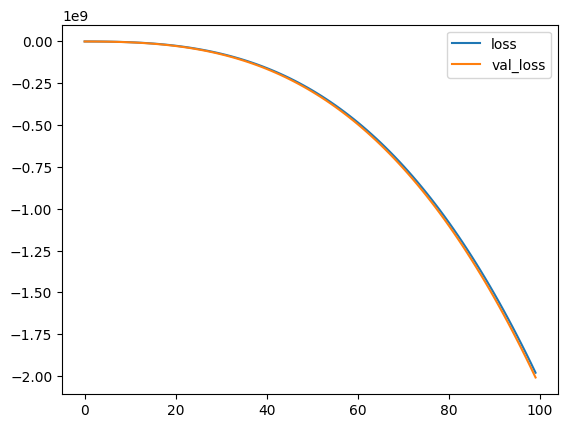

In [675]:
# Visualizing evaluation Metric Score chart
metrics = pd.DataFrame(model.history.history)

metrics[['loss','val_loss']].plot()

<Axes: >

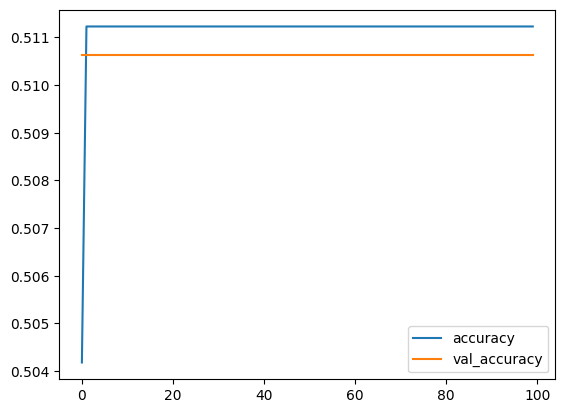

In [676]:
metrics[['accuracy','val_accuracy']].plot()

In [677]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

574/574 [==============================] - 1s 1ms/step


In [678]:
# Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[   0  437    0]
 [   0 9373    0]
 [   0 8546    0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       437
           1       0.51      1.00      0.68      9373
           2       0.00      0.00      0.00      8546

    accuracy                           0.51     18356
   macro avg       0.17      0.33      0.23     18356
weighted avg       0.26      0.51      0.35     18356



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **4. K-Nearest Neighbors (KNN) Model:**

In [679]:
# ML Model - 3 Implementation

k_neighbor = KNeighborsClassifier(n_neighbors=3)

# Fit the Algorithm
k_neighbor.fit(X_train, y_train)

# Predict on the model
y_pred = k_neighbor.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix

def test_score(ytest, ypred):
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)  # Corrected from precision_score
    recall = recall_score(ytest, ypred)  # Corrected from precision_score

    metrics = {'Accuracy': accuracy, 'Precision': precision, 'F1': f1, 'Recall': recall}
    print('==='* 5,"Evaluation metrics", '==='* 5)
    return pd.DataFrame(metrics, index=[0]).T.rename(columns={0: 'Score'})

test_score(y_test, y_pred)

# print('==='* 5,"Confusion Metrix", '==='* 5)
# confusion_matrix(y_test, y_pred)

ValueError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.



### **5. Support Vector Machine (SVM) Model**

In [649]:
# ML Model - 3 Implementation
from sklearn.svm import SVC

support_vector = SVC(kernel = 'linear')
# Fit the Algorithm
support_vector.fit(X_train, y_train)
# Predict on the model
y_pred = support_vector.predict(X_test)

support_vector.score(X_test, y_test)

test_score(y_test, y_pred)

TypeError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***